Exploration Notebook

In [23]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


11 columns with 3755 rows:

4 numeric columns: work_year, salary, salary_in_usd, remote_ratio

7 categorical columns: experience_level, employment_type, job_title, salary_currency, employee_residense, company_location, company_size


In [4]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

Inspect interesting values of categorical columns:

In [5]:
df_groupedExperience = df.groupby("experience_level")
df_groupedExperience.mean()

,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,2022.053125,188381.178125,78546.284375,55.156250
EX,2022.385965,246802.201754,194930.929825,48.245614
MI,2022.203727,248200.306832,104525.939130,46.211180
SE,2022.468203,170048.965421,153051.071542,45.071542


In [6]:
df_groupedEmployment = df.groupby("employment_type")
df_groupedEmployment.mean()

,work_year,salary,salary_in_usd,remote_ratio
employment_type,,,,
CT,2021.700000,113300.000000,113446.900000,95.000000
FL,2021.700000,288755.500000,51807.800000,70.000000
FT,2022.381657,191146.539268,138314.199570,45.938677
PT,2021.411765,79910.823529,39533.705882,76.470588


Inspect if salary_currency can be dropped:

In [7]:
df_groupedResidence = df.groupby("employee_residence")
display(df_groupedResidence)

In [8]:
import matplotlib.pyplot as plt


(array([ 518., 1310., 1301.,  501.,  100.,   18.,    7.]),
 array([  5132.        ,  68684.57142857, 132237.14285714, 195789.71428571,
        259342.28571429, 322894.85714286, 386447.42857143, 450000.        ]),
 <BarContainer object of 7 artists>)

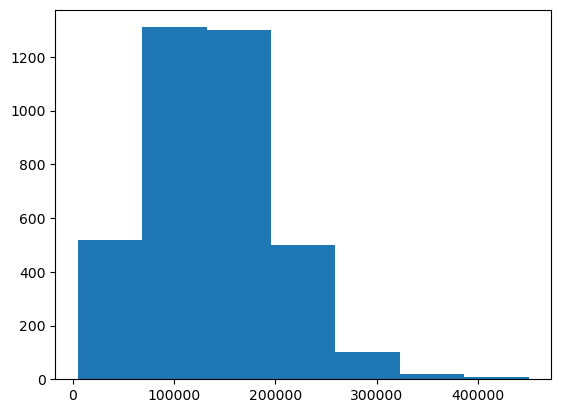

In [9]:
# plot a histogram with 5 bins in the first sub plot
plt.hist(df['salary_in_usd'], bins=7)

In [10]:
experience_salary = df.groupby('experience_level').mean()
experience_salary


,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,2022.053125,188381.178125,78546.284375,55.156250
EX,2022.385965,246802.201754,194930.929825,48.245614
MI,2022.203727,248200.306832,104525.939130,46.211180
SE,2022.468203,170048.965421,153051.071542,45.071542


In [11]:
company_size = df.groupby('company_size').mean()
company_size

,work_year,salary,salary_in_usd,remote_ratio
company_size,,,,
L,2021.775330,438794.372247,118300.982379,60.572687
M,2022.501110,150712.836029,143130.548367,42.990802
S,2021.493243,281430.101351,78226.682432,72.297297


In [41]:
location_salary = df.groupby('company_location').mean()
location_salary.head()
location_salary

,work_year,salary,salary_in_usd,remote_ratio
company_location,,,,
AE,2021.333333,100000.000000,100000.000000,66.666667
AL,2022.000000,10000.000000,10000.000000,50.000000
AM,2023.000000,50000.000000,50000.000000,0.000000
AR,2022.000000,25000.000000,25000.000000,100.000000
AS,2021.333333,468333.333333,29351.000000,66.666667
...,...,...,...,...
TH,2022.333333,618333.333333,23064.333333,66.666667
TR,2021.400000,114600.000000,19058.000000,40.000000
UA,2022.500000,57850.000000,57850.000000,37.500000


In [42]:
jobs = df['job_title'].value_counts().rename_axis('Job-Title').reset_index(name='counts')
jobs

,Job-Title,counts
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
...,...,...
88,Principal Machine Learning Engineer,1
89,Azure Data Engineer,1
90,Manager Data Management,1
91,Marketing Data Engineer,1


<BarContainer object of 4 artists>

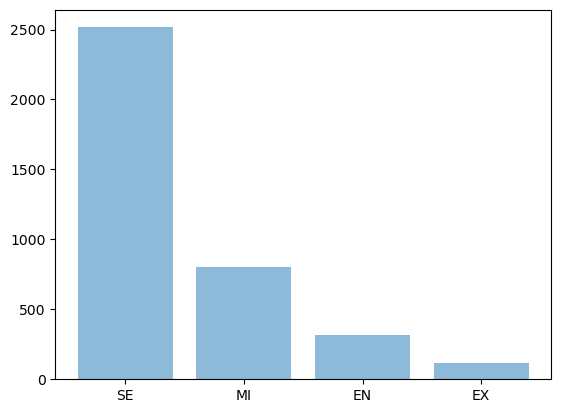

In [49]:
experience = df['experience_level'].value_counts().rename_axis('Experience-Level').reset_index(name='counts')
experience

plt.bar( experience['Experience-Level'],experience['counts'],align='center', alpha=0.5)



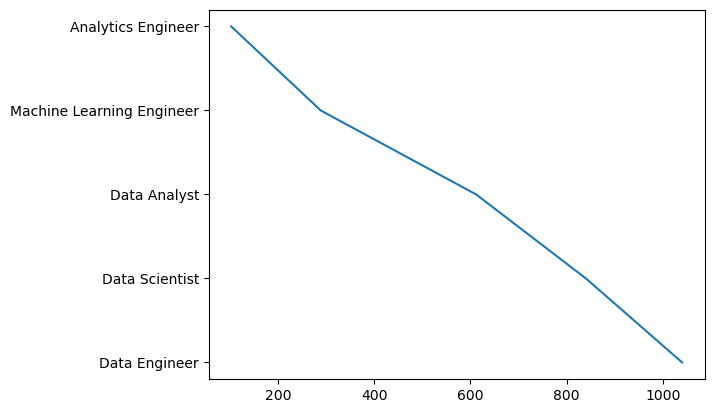

In [15]:

salary_count = df['salary_in_usd'].value_counts()
salary_count

plt.plot(jobs.values,jobs.index)

In [16]:
df['bins'] = pd.cut(x=df['salary_in_usd'], bins=[50000, 100000, 150000, 200000,
                                          250000, 300000])
print(df)
 

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [21]:

new_salary_count = df['bins'].value_counts().rename_axis('bins').reset_index(name='counts')
new_salary_count

,bins,counts
0,"(100000, 150000]",1262
1,"(150000, 200000]",872
2,"(50000, 100000]",803
3,"(200000, 250000]",379
4,"(250000, 300000]",110


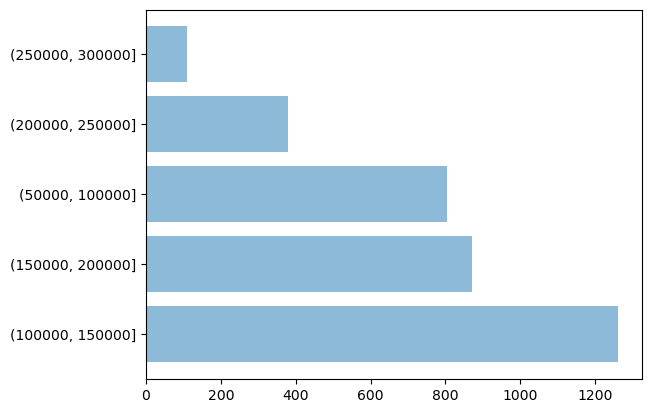

In [38]:
y_pos = np.arange(len(new_salary_count['bins']))

plt.barh(y_pos, new_salary_count['counts'],align='center', alpha=0.5)
plt.yticks(y_pos, new_salary_count['bins'])


plt.show()